In [7]:
import pathlib
import datetime

import numpy as np
import netCDF4
import pandas as pd
import utide
import matplotlib.pyplot as plt
import peakutils
import IPython.display
import ipywidgets.widgets

%matplotlib inline

In [3]:
datasets = list(pathlib.Path('../../data/waterbase').glob('id1-*.nc'))

all_series = {}
for dataset in datasets:
    name = dataset.stem[4:]
    ds = netCDF4.Dataset(dataset)
    ds.variables.keys()
    ssh = np.squeeze(ds.variables['sea_surface_height'][:])
    time = netCDF4.num2date(ds.variables['time'][:], ds.variables['time'].units)
    series = pd.Series(data=ssh, index=time, name=name)
    all_series[name] = series

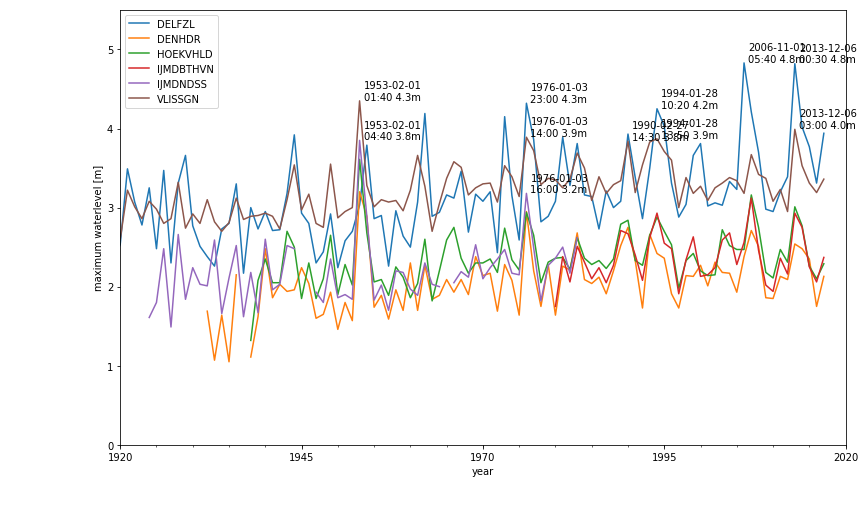

In [42]:
fig, ax = plt.subplots(figsize=(13, 8))
for name, series in all_series.items():
    if 'HARLGN' in name:
        continue
    resampled = series.resample('A', label='first', loffset=datetime.timedelta(days=1))
    resampled.max().plot(ax=ax, label=name)
ax.set_xlim(datetime.datetime(1920, 1, 1), datetime.datetime(2020, 1, 1));
ax.set_ylim(0, 5.5)
ax.legend(loc='best')

for name, series in sorted(all_series.items()):
    if name not in ('DELFZL', 'VLISSGN', 'IJMDNDSS'):
        continue
    peaks_idx = peakutils.indexes(series, thres=0.88, min_dist=100)
    peaks = series.iloc[peaks_idx].sort_values(ascending=False).head(n=5)
    for date, val in peaks.items():
        ax.annotate(
            "{} {:.1f}m".format(
                date.strftime('%Y-%m-%d\n%H:%M'), val
            ), 
            (date, val), 
            textcoords='offset points', 
            xytext=(4, 1)
        )
ax.set_xlabel('year')
ax.set_ylabel('maximum waterlevel [m]');


In [43]:
for name, series in sorted(all_series.items()):
    peaks_idx = peakutils.indexes(series, thres=0.88, min_dist=100)
    peaks = series.iloc[peaks_idx].sort_values(ascending=False).head(n=5)
    print(peaks)


2006-11-01 05:40:00.000000    4.83
2013-12-06 00:30:00.000006    4.82
1976-01-03 23:00:00.000006    4.32
1916-01-13 16:40:00.000000    4.26
1994-01-28 10:20:00.000000    4.25
Name: DELFZL, dtype: float32
1953-02-01 04:40:00    3.20
1976-01-03 19:00:00    2.95
1954-12-22 04:40:00    2.89
1990-02-26 19:40:00    2.75
2007-11-09 05:20:00    2.71
Name: DENHDR, dtype: float32
1957-12-08 22:40:00    6.72
1959-05-26 13:40:00    5.61
1957-12-30 22:40:00    5.43
Name: HARLGN, dtype: float32
1953-02-01 04:40:00    3.61
2007-11-09 01:40:00    3.16
2013-12-06 04:00:00    3.01
1976-01-03 16:00:00    2.94
Name: HOEKVHLD, dtype: float32
2007-11-09 02:39:59.999998    3.12
2013-12-06 04:49:59.999996    2.93
1994-01-28 15:19:59.999996    2.93
2014-10-22 02:10:00.000004    2.75
1989-02-14 08:50:00.000002    2.71
Name: IJMDBTHVN, dtype: float32
1953-02-01 04:40:00    3.85
1976-01-03 16:00:00    3.18
Name: IJMDNDSS, dtype: float32
1953-02-01 01:40:00.000000    4.35
2013-12-06 03:00:00.000000    3.99
1976-01